In [1]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn import linear_model
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
realData = pd.read_csv("Data/RealData.csv")

In [ ]:
#Multinomial Naive Bayes Classifier
regularizers = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
testAcc= np.zeros(len(regularizers))
trainAcc = np.zeros(len(regularizers))
index=0
X = realData["Text"]
Y = realData["Class"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state=1)
for A in regularizers:
    text_clf = Pipeline([
         ('vect', CountVectorizer()),
         ('tfidf', TfidfTransformer()),
         ('clf', MultinomialNB(alpha=A))])
    clf = text_clf.fit(trainX, trainY)
    Y_predTrain = text_clf.predict(trainX)
    Y_predTest = text_clf.predict(testX)
    trainAcc[index] = accuracy_score(trainY, Y_predTrain)
    testAcc[index] = accuracy_score(testY, Y_predTest)
    index += 1
plt.plot(regularizers, trainAcc, 'ro--', regularizers, testAcc, 'bv-')
plt.xlabel('Regularizer (A)')
plt.ylabel('Accuracy')
plt.title('Naive Bayes')
plt.legend(['Validation','Testing'])
MNBacc = max(testAcc)
print("Max Test Accuracy:", MNBacc)
MNBregmax = regularizers[np.argmax(testAcc)]
print("Max Accuracy Parameter: ", MNBregmax)

In [ ]:
# Logistic Regression
regularizers = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
testAcc= np.zeros(len(regularizers))
trainAcc = np.zeros(len(regularizers))
index=0
X = realData["Text"]
Y = realData["Class"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.25, random_state=1)

for C in regularizers:
    text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', linear_model.LogisticRegression(C=C, penalty='l1', solver='liblinear'))])
    clf = text_clf.fit(trainX, trainY)
    Y_predTrain = text_clf.predict(trainX)
    Y_predTest = text_clf.predict(testX)
    trainAcc[index] = accuracy_score(trainY, Y_predTrain)
    testAcc[index] = accuracy_score(testY, Y_predTest)
    index += 1
plt.plot(regularizers, trainAcc, 'ro--', regularizers, testAcc, 'bv-')
plt.xlabel('Regularizer (C)')
plt.ylabel('Accuracy')
plt.title('Logistic regression')
plt.legend(['Validation','Testing'])
LRacc = max(testAcc)
print("Max Test Accuracy:", LRacc)
LRregmax = regularizers[np.argmax(testAcc)]
print("Max Accuracy Parameter: ", LRregmax)

In [ ]:
accuracy = pd.DataFrame({"Accuracy" : [MNBacc, LRacc], "Parameter" : [MNBregmax, LRregmax]}, index=["Multinomial Naive Bayes", "Linear Regression"])
accuracy

In [ ]:
text_clf = Pipeline([
         ('vect', CountVectorizer()),
         ('tfidf', TfidfTransformer()),
         ('clf', MultinomialNB(alpha=MNBregmax))])
MNBclf = text_clf.fit(trainX, trainY)
text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('tfidf', TfidfTransformer()),
     ('clf', linear_model.LogisticRegression(C=LRregmax, penalty='l1', solver='liblinear'))])
LRclf = text_clf.fit(trainX, trainY)

In [ ]:
print("Number of features: ", MNBclf['clf'].feature_count_.size)
print("Intercept: ", MNBclf['clf'].intercept_)
feature_names = MNBclf['vect'].get_feature_names()
coefs_with_fnstop = sorted(zip(MNBclf['clf'].feature_log_prob_[0], feature_names))
coefs_with_fnsbot = sorted(zip(MNBclf['clf'].feature_log_prob_[1], feature_names))
top = zip(coefs_with_fnsbot[:-(20 + 1):-1], coefs_with_fnstop[:-(20 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    print(coef_1, fn_1, coef_2, fn_2)

In [ ]:
print("Number of features: ", LRclf['clf'].coef_.size)
print("Intercept :" ,LRclf['clf'].intercept_)
feature_names = LRclf['vect'].get_feature_names()
coefs_with_fns = sorted(zip(LRclf['clf'].coef_[0], feature_names))

top = zip(coefs_with_fns[:20], coefs_with_fns[:-(20 + 1):-1])
for (coef_1, fn_1), (coef_2, fn_2) in top:
    print(coef_1, fn_1, coef_2, fn_2)

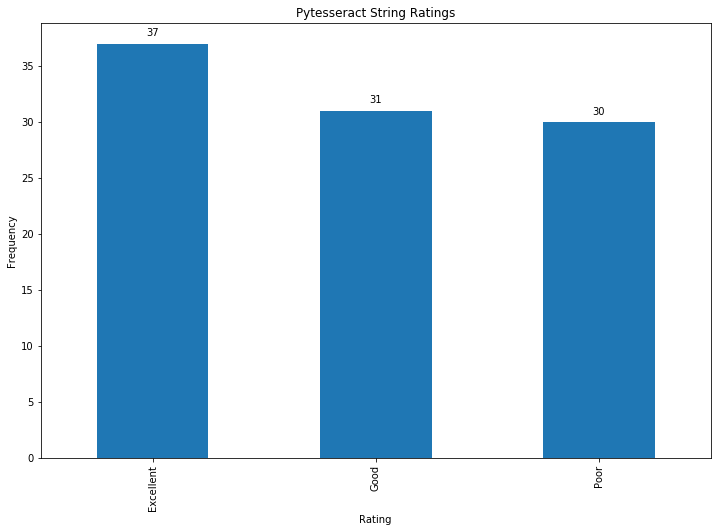

In [6]:
data = pd.read_excel("Data/PytesseractStringRatingComplete.xlsx")
#data["Rating"].value_counts().plot(kind='bar')

plt.figure(figsize=(12,8))
ax = data["Rating"].value_counts().plot(kind='bar')
labels = data["Rating"].value_counts()
ax.set_title("Pytesseract String Ratings")
ax.set_xlabel("Rating")
ax.set_ylabel("Frequency")
rects = ax.patches
ax.set_xticklabels(["Excellent", "Good", "Poor"])
for rect, labels in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.5, labels, ha="center", va='bottom')